## Getting Magnetometer Data from the Server

Aberystwyth magnetometer data can be collected using the REST API of the [Magnetometer Data Server](https://github.com/Jammyjamjamman/Magnetometer_data_server). An example of retrieving the magnetometer data can be seen below:

In [1]:
import requests
import io
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

### Getting information about the sensors.

In [49]:
r = requests.get("http://localhost:5000/available_sensors")
# Check the request was recieved
if r.status_code == requests.codes.ok:
    sensors = r.json()
    print("Sensor information:")
    for sensor in sensors:
        print()
        for key in sensor:
            print(key+":", sensor[key])
        

Sensor information:

UK_grid_ref: SN6056882610
_id: frg_single_fgm3
address: B4572, Aberystwyth SY23 3DG, UK
coord_sys: F
elevation: 133
latitude: 52.423649
longitude: -4.0519305
name: Frongoch Farm
raw_dat_params: ['time', 'reading', 'temperature']

In Operation since: 1957
_id: HAD
coord_sys: HDZF
elevation: 95
latitude: 50.995
longitude: 355.516
name: Hartland
orientation: HDZF
website: http://geomag.bgs.ac.uk/operations/hartland.html

INTERMAGNET member since: 1991
In Operation since: 1908
_id: ESK
address: Eskdalemuir, Dumfries and Galloway, Scotland, United Kingdom
coord_sys: HDZF
elevation: 245
latitude: 55.314
longitude: 356.794
name: Eskdalemuir
orientation: HDZF
website: http://geomag.bgs.ac.uk/operations/eskdale.html


The magnetometer `_id` can be used to retrieve data for that observatory. Some examples are given below.

### Getting Frongoch Farm Data:

,F,igrf
time,,
2016-03-20 00:00:00,53.918818,48907.195312
2016-03-20 00:01:00,40.655088,48907.195312
2016-03-20 00:02:00,33.366903,48907.195312
2016-03-20 00:03:00,35.334082,48907.195312
2016-03-20 00:04:00,33.689546,48907.195312


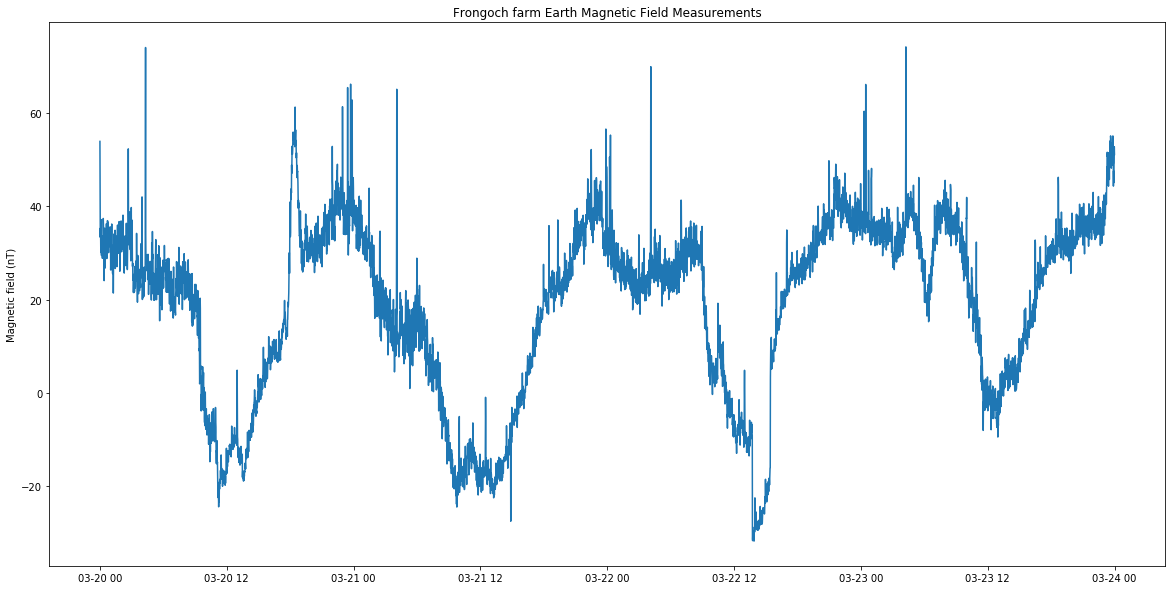

In [50]:
# The url of the magnetometer server
dat_url = 'http://localhost:5000/mag_dat'

# Set what data we want.
# sensor_id: the id of the sensor we want "frg_single_fgm3".
# starttime: the starttime of the sensor data we want.
# endtime: the endtime of the sensor data we want.
#
# Note: the times need to be in POSIX time.
# This can be obtained by converting a datestring e.g. "2016-03-20 00:00:00"
# into a pandas timestamp, then using the timestamp() method to get the time
# as a POSIX time number.
payload = {"sensor_id": "frg_single_fgm3",
           "starttime": int(pd.Timestamp("2016-03-20 00:00:00").timestamp()),
           "endtime": int(pd.Timestamp("2016-03-23 23:59:00").timestamp())
         }

# Request the data from the web
r = requests.get(dat_url, params=payload)
# Check the request was recieved
if r.status_code == requests.codes.ok:
    # read the response into a pandas dataframe.
    # Note: pd.read_csv() expects a file or a buffer, but the response
    # is text. Therefore, read string into a stringIO buffer.
    frg_dat = pd.read_csv(io.StringIO(r.text), parse_dates=True, index_col="time")
    # View data.
    display(frg_dat.head())
    # Plot the data.
    plt.figure(figsize=(20,10))
    # remove huge spikes in the magnetometer data before plotting.
    frg_dat_valid = frg_dat.loc[frg_dat["F"] > -200]
    plt.title("Frongoch farm Earth Magnetic Field Measurements")
    plt.ylabel("Magnetic field (nT)")
    plt.plot(frg_dat_valid.index, frg_dat_valid["F"])
else:
    print("Failed to get data!")

## Getting Hartland Data:

,H,D,Z,F
time,,,,
2016-03-20 00:00:00,19749.246094,-130.583725,44358.0,48556.0
2016-03-20 00:01:00,19749.246094,-130.583725,44358.0,48556.0
2016-03-20 00:02:00,19749.246094,-130.583725,44358.0,48556.0
2016-03-20 00:03:00,19748.246094,-130.590332,44358.0,48556.0
2016-03-20 00:04:00,19748.246094,-130.590332,44358.0,48555.0


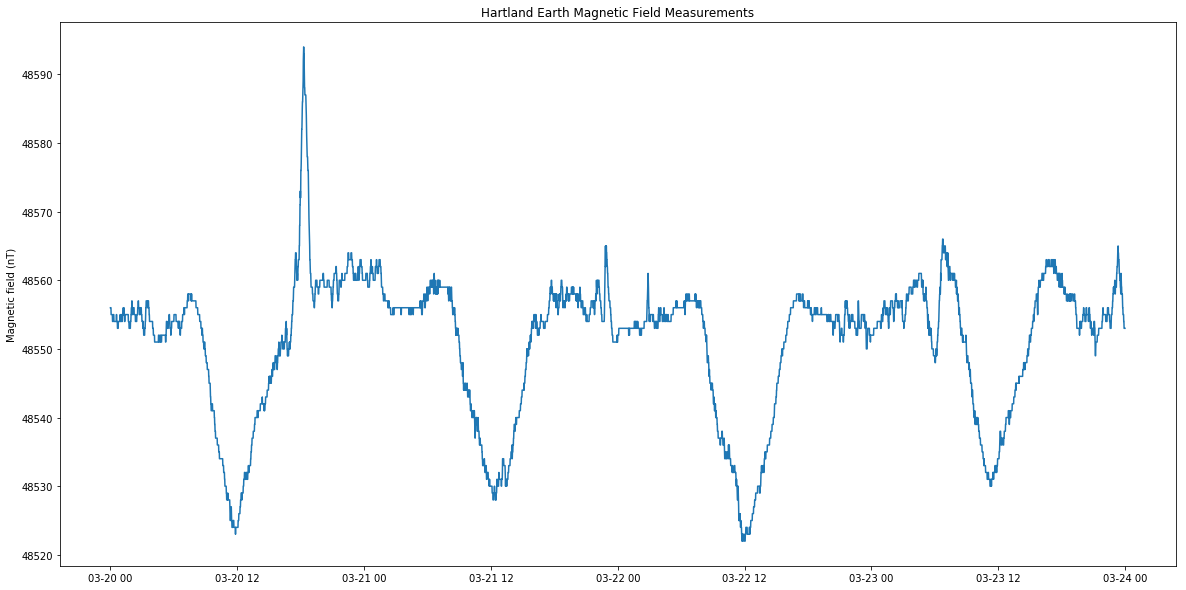

In [51]:
# This time, set the sensor_id to HAD to get hartland data.
# We will keep the times the same, so just change the sensor_id value.
payload["sensor_id"] = "HAD"

# Request the data from the web
r = requests.get(dat_url, params=payload)
# Check the request was recieved
if r.status_code == requests.codes.ok:
    # read the response into a pandas dataframe.
    # Note: pd.read_csv() expects a file or a buffer, but the response
    # is text. Therefore, read string into a stringIO buffer.
    HAD_dat = pd.read_csv(io.StringIO(r.text), parse_dates=True, index_col="time")
    # view data.
    display(HAD_dat.head())
    # Plot the data.
    plt.figure(figsize=(20,10))
    plt.title("Hartland Earth Magnetic Field Measurements")
    plt.ylabel("Magnetic field (nT)")
    plt.plot(HAD_dat.index, HAD_dat["F"])
else:
    print("Failed to get data!")

## Getting Eskdalemuir Data:

,H,D,Z,F
time,,,,
2016-03-20 00:00:00,17550.943359,-151.066299,46481.0,49684.0
2016-03-20 00:01:00,17550.943359,-151.066299,46481.0,49684.0
2016-03-20 00:02:00,17550.898438,-150.870621,46481.0,49684.0
2016-03-20 00:03:00,17549.900391,-150.879227,46481.0,49684.0
2016-03-20 00:04:00,17549.900391,-150.879227,46481.0,49684.0


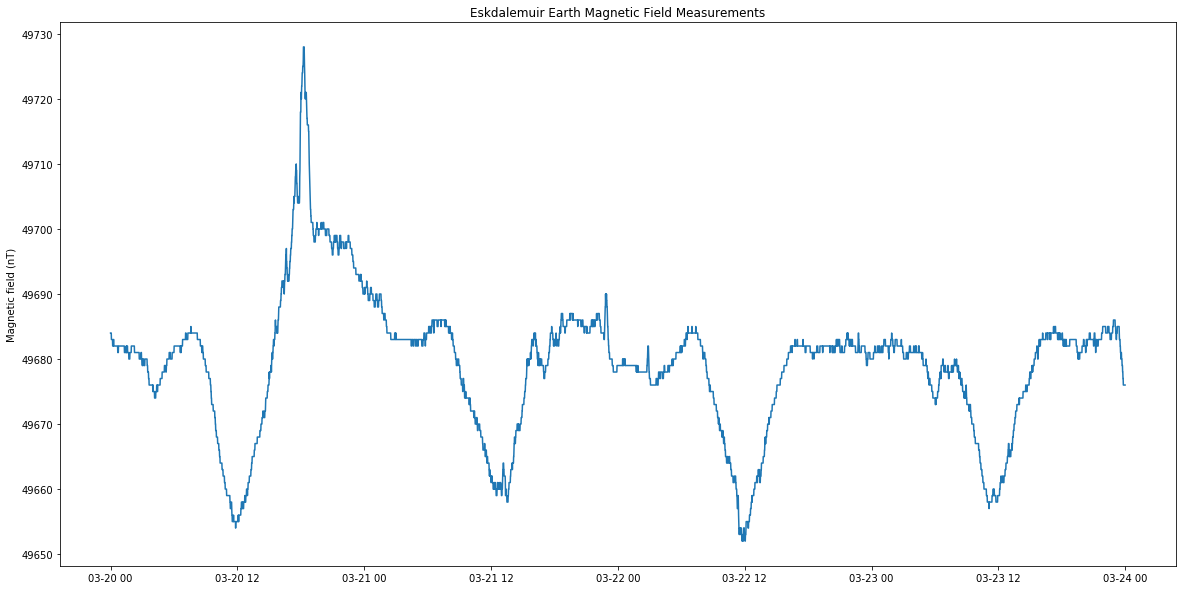

In [52]:
# Same way as Hartland data is obtained.
payload["sensor_id"] = "ESK"

# Request the data from the web
r = requests.get(dat_url, params=payload)
# Check the request was recieved
if r.status_code == requests.codes.ok:
    # read the response into a pandas dataframe.
    # Note: pd.read_csv() expects a file or a buffer, but the response
    # is text. Therefore, read string into a stringIO buffer.
    ESK_dat = pd.read_csv(io.StringIO(r.text), parse_dates=True, index_col="time")
    # view data.
    display(ESK_dat.head())
    # Plot the data.
    plt.figure(figsize=(20,10))
    plt.title("Eskdalemuir Earth Magnetic Field Measurements")
    plt.ylabel("Magnetic field (nT)")
    plt.plot(ESK_dat.index, ESK_dat["F"])
else:
    print("Failed to get data!")

Magnetometer data has been retrieved, and it is stored in the pandas dataframes `frg_dat`, `HAD_dat` and `ESK_dat`. More processing and analysis of this data can be done using various python libraries e.g. pandas, numpy and scipy.

### Extra data analysis/ processing examples:

Daily averages


,F,igrf,tot_field
time,,,
2016-03-20,18.724602,48907.195312,48925.919914
2016-03-21,10.286030,48907.250000,48917.536030
2016-03-22,18.170524,48907.304688,48925.475211
2016-03-23,27.089278,48907.355469,48934.444747


Daily hour max:


,F,igrf,tot_field
time,,,
2016-03-20,46.515882,48907.195312,48953.711195
2016-03-21,39.242642,48907.250000,48946.492642
2016-03-22,40.367339,48907.304688,48947.672026
2016-03-23,47.372435,48907.355469,48954.727904


Daily hour min:


,F,igrf,tot_field
time,,,
2016-03-20,-17.767281,48907.195312,48889.428031
2016-03-21,-18.247272,48907.250000,48889.002728
2016-03-22,-34.012622,48907.304688,48873.292066
2016-03-23,-2.586548,48907.355469,48904.768921


Daily variation:


,F,igrf,tot_field
time,,,
2016-03-20,64.283163,0.0,64.283163
2016-03-21,57.489914,0.0,57.489914
2016-03-22,74.379961,0.0,74.379961
2016-03-23,49.958983,0.0,49.958983


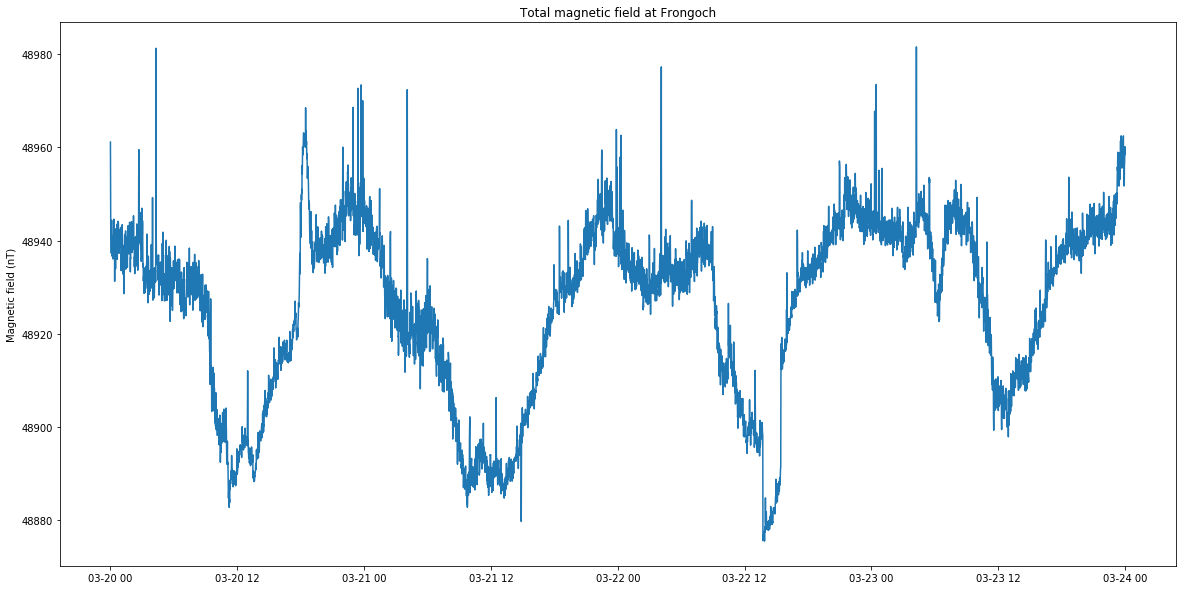

In [53]:
# Getting the absolute change in Frongoch magnetic field.
frg_dat["tot_field"] = frg_dat["F"] + frg_dat["igrf"]
plt.figure(figsize=(20,10))
plt.title("Total magnetic field at Frongoch")
plt.ylabel("Magnetic field (nT)")
frg_dat_valid = frg_dat.loc[frg_dat["F"] > -200]
plt.plot(frg_dat_valid.index, frg_dat_valid["tot_field"])

# Getting daily averages
print("Daily averages")
display(frg_dat.resample("1d").mean())

# Downsample + smooth to 1 hour readings.
frg_1h = frg_dat.resample("1h").mean()
# Getting daily 1 hour average maximums.
print("Daily hour max:")
display(frg_1h.resample("1d").max())

# Getting daily 1 hour average minimums.
print("Daily hour min:")
display(frg_1h.resample("1d").min())

# Getting daily differences.
print("Daily variation:")
display(frg_1h.resample("1d").max() - frg_1h.resample("1d").min())

# Save the data locally:
frg_dat.to_csv("my_frongoch_dat.csv")